
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Filter Tropical Cyclones (TCs) that affect the site and parameterize

inputs required: 
  * Storm tracks records (ibtracks file)
  * longitude and latitude of the site (location of the waves record)
  * radius for TCs selection (º)

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.storms import Extract_Circle, GetCategoryChangeProbs

from teslakit.plotting.storms import Plot_TCs_TracksParams, \
Plot_TCs_HistoricalTracks, Plot_TCs_HistoricalTracks_Category, Plot_Category_Change



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# load data and set parameters

TCs_wmo = db.Load_TCs_noaa()  # noaa Allstorms.ibtracs_wmo

# wave point longitude and latitude
pnt_lon = 167.5
pnt_lat = 9.75

# radius for TCs selection (º)
r1 = 14
r2 = 4



## Historical TCs - extraction

In [4]:
# --------------------------------------
# Select Historical TCs inside circle

# dictionary with needed variable names 
d_vns = {
    'longitude': 'lon_wmo',
    'latitude': 'lat_wmo',
    'time': 'time_wmo',
    'pressure': 'pres_wmo',
}

# Select TCs that crosses a circular area R1
TCs_r1_tracks, TCs_r1_params = Extract_Circle(TCs_wmo, pnt_lon, pnt_lat, r1, d_vns)
print(TCs_r1_tracks)

# Select TCs that crosses a circular area R2
TCs_r2_tracks, TCs_r2_params = Extract_Circle(TCs_wmo, pnt_lon, pnt_lat, r2, d_vns)
print(TCs_r2_tracks)

# store data
db.Save_TCs_r1_hist(TCs_r1_tracks, TCs_r1_params)
db.Save_TCs_r2_hist(TCs_r2_tracks, TCs_r2_params)


<xarray.Dataset>
Dimensions:          (center: 26, storm: 292, time: 137)
Coordinates:
  * storm            (storm) int64 1660 1665 1742 1745 ... 7309 7337 7341 7350
Dimensions without coordinates: center, time
Data variables:
    storm_sn         (storm) |S13 ...
    name             (storm) |S57 ...
    numObs           (storm) int16 ...
    season           (storm) int16 ...
    track_type       (storm) int8 ...
    genesis_basin    (storm) int8 ...
    num_basins       (storm) int8 ...
    basin            (storm, time) float32 ...
    wind_avg_period  (center) float32 ...
    source           (center) |S10 ...
    time_wmo         (storm, time) datetime64[ns] 1951-03-18T06:00:00 ... NaT
    lat_wmo          (storm, time) float32 5.7 6.0 6.3999996 6.7 ... nan nan nan
    lon_wmo          (storm, time) float32 158.3 159.4 160.4 ... nan nan nan
    alt              (storm, time) float32 ...
    wind_wmo         (storm, time) float32 ...
    pres_wmo         (storm, time) float32 1002

In [5]:
# Plot storm tracks world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

Plot_TCs_HistoricalTracks(
    TCs_r1_tracks, TCs_r2_tracks,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, r2,
);


basemap module required.


In [6]:
# zoom map

r_zoom = 20

Plot_TCs_HistoricalTracks(
    TCs_r1_tracks, TCs_r2_tracks,
    pnt_lon-r_zoom, pnt_lon+r_zoom, pnt_lat-r_zoom, pnt_lat+r_zoom,
    pnt_lon, pnt_lat, r1, r2,
);

basemap module required.


In [7]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

# r1
Plot_TCs_HistoricalTracks_Category(
    TCs_r1_tracks, TCs_r1_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1,
);

# r2
Plot_TCs_HistoricalTracks_Category(
    TCs_r2_tracks, TCs_r2_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2,
);

basemap module required.
basemap module required.


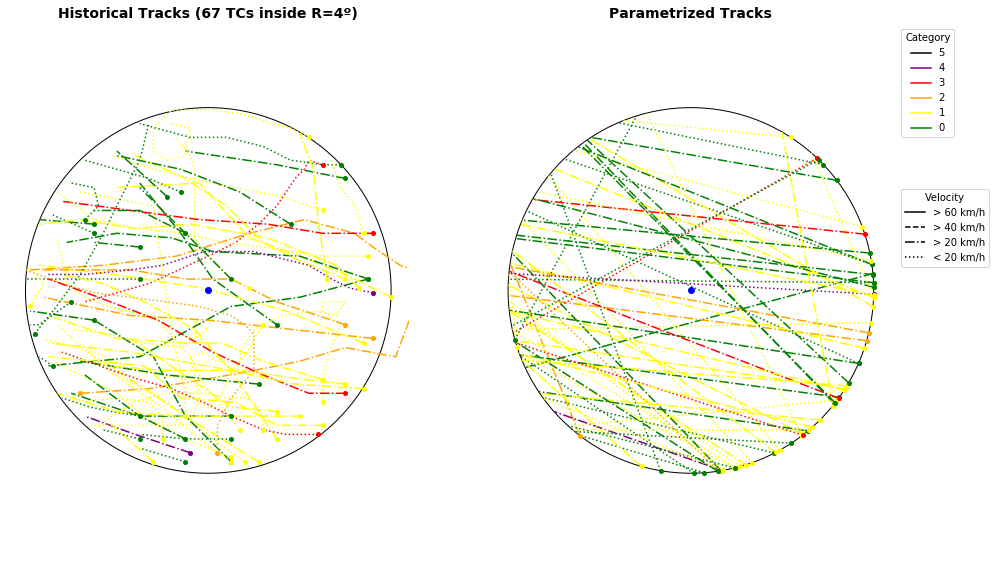

In [8]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)

Plot_TCs_TracksParams(TCs_r2_tracks, TCs_r2_params);


In [9]:
# Calculate Historical TCs category change probabilities

categ_cp = GetCategoryChangeProbs(TCs_r1_params, TCs_r2_params)
print(categ_cp)


<xarray.Dataset>
Dimensions:                  (category: 6)
Coordinates:
  * category                 (category) int64 0 1 2 3 4 5
Data variables:
    category_change_count    (category, category) int64 7 12 4 3 1 ... 0 0 0 0 0
    category_change_sum      (category) int64 83 95 15 14 13 6
    category_change_probs    (category, category) float64 0.07778 0.1 ... 0.0
    category_nochange_probs  (category) float64 0.9222 0.7917 ... 0.619 0.6667
    category_change_cumsum   (category, category) float64 0.07778 0.1 ... 0.3333


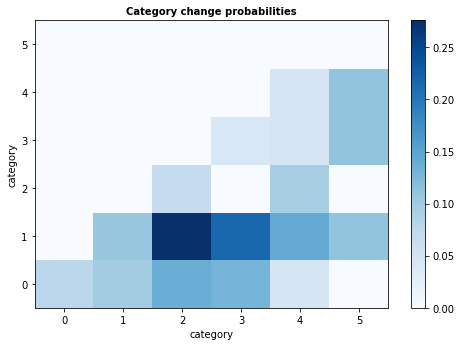

In [10]:
# Plot category change probabilities

Plot_Category_Change(categ_cp);
